
# Summary:

in this notebook, we first make the two Chicago and San Diego datasets similar in terms of features and then we run the baseline ML methods, Transfer learning and domain adaptation models on them. We aim to transfer from one city to another.

- Classification
- Timeline Split
- Results reported after statistical significance test
- Nan values: Noisy Mean
- Augmentation: No Aug

#Libraries

In [1]:
# pip install adapt stats

In [2]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm
import stats

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier as xgbc
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [4]:
pd.options.display.max_rows = None

In [5]:
# results_f

NameError: name 'results_f' is not defined

In [6]:
results_f = {
    'RF': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'f', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

results_AUC = {
    'RF': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'AUC', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}
results_f_std = {
    'RF': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'f_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

results_np = {
    'RF': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'np', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

results_np_std = {
    'RF': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'np_std', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

results_np_P = {
    'RF': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'np_P', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

results_np_R = {
    'RF': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-FA': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-BW': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-CORAL': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'RF-SA': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-FA': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-BW': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-CORAL': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
    'LR-SA': {'metric':'np_R', 'chi-chi': 0, 'chi-san': 0, 'san-chi':0, 'san-san':0},
}

In [7]:
def metrics(y_true, y_pred, roundd = False):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    pa, ra, fa, sa = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    if roundd:
        return np.round(f[0],3), np.round(f[1], 3), np.round(fa, 3)
    return f[0], f[1], fa

def ES(y_true, y_pred, roundd = False):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    pa, ra, fa, sa = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return p[0], p[1], r[0], r[1]

def stid(source_name, target_name):
  return (source_name[0:3] + '-' + target_name[0:3]).lower()

In [8]:
def get_LR_model(XX, YY):
  lr = LogisticRegression()
  param_grid = {
      'solver': ['newton-cg', 'lbfgs', 'liblinear'],
      'C': [1e-2, 1, 10],
      'max_iter': [500, 1000, 1500]
  }
  grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 10, scoring='f1_weighted')
  grid_search.fit(XX, YY)
  print(grid_search.best_params_)
  return LogisticRegression(max_iter = grid_search.best_params_['max_iter'], C = grid_search.best_params_['C'], solver = grid_search.best_params_['solver'])



def get_RF_model(XX, YY):
  rf = RandomForestClassifier()
  max_depth = [int(x) for x in np.linspace(10, 110, num = 15)]
  max_depth.append(None)
  random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 400, stop = 2000, num = 25)],
               'max_features': ['sqrt', 'log2', None],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10, 15, 20],
               'min_samples_leaf': [1, 2, 3, 4, 7],
               'bootstrap': [True, False]

  }

  rf_random = RandomizedSearchCV(estimator = rf, scoring='f1_weighted',
                                 param_distributions = random_grid, n_iter = 110,
                                 cv = 3, verbose=10, random_state=42, n_jobs = -1)
  rf_random.fit(XX, YY)
  print(rf_random.best_params_)
  return RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'],
                               max_features=rf_random.best_params_['max_features'],
                               max_depth=rf_random.best_params_['max_depth'],
                               min_samples_split=rf_random.best_params_['min_samples_split'],
                               min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
                               bootstrap=rf_random.best_params_['bootstrap']), rf_random.best_params_

def get_RF(abcd):
    return RandomForestClassifier(n_estimators=abcd['n_estimators'],
                               max_features=abcd['max_features'],
                               max_depth=abcd['max_depth'],
                               min_samples_split=abcd['min_samples_split'],
                               min_samples_leaf=abcd['min_samples_leaf'],
                               bootstrap=abcd['bootstrap'])

def get_RF10(abcd):
    return xgbc(max_depth = abcd['max_depth'],
                               min_child_weight=abcd['min_child_weight'],
                               gamma=abcd['gamma'],
                               subsample=abcd['subsample'],
                               colsample_bytree=abcd['colsample_bytree'],
                               learning_rate=abcd['learning_rate'],
                               n_estimators=abcd['n_estimators'],
                               reg_alpha=abcd['reg_alpha'])
def get_RF_model10(XX, YY):
  xx = xgbc()
  param_dist = {
    'max_depth': [int(x) for x in np.linspace(1, 30, num = 2)],
    'min_child_weight':range(1,20,3),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/100.0 for i in range(50,100,5)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'learning_rate': [1e-5,1e-4,1e-3, 1e-2, 0.1,0.5, 0.9],
    'n_estimators': [2,5,20,80,200,500,800,1200,1700],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    }

  rf_random = RandomizedSearchCV(estimator = xx, scoring='f1_weighted',
                                 param_distributions = param_dist, n_iter = 50,
                                 cv = 3, verbose=2, random_state=42, n_jobs = -1)
  rf_random.fit(XX, YY)
  print(rf_random.best_params_)
  return xgbc(max_depth = rf_random.best_params_['max_depth'],
                               min_child_weight=rf_random.best_params_['min_child_weight'],
                               gamma=rf_random.best_params_['gamma'],
                               subsample=rf_random.best_params_['subsample'],
                               colsample_bytree=rf_random.best_params_['colsample_bytree'],
                               learning_rate=rf_random.best_params_['learning_rate'],
                               n_estimators=rf_random.best_params_['n_estimators'],
                               reg_alpha=rf_random.best_params_['reg_alpha']), rf_random.best_params_


In [9]:
def stat_significance_trainer_tester(model, X_train, y_train, X_test, y_test, target_X, target_y, source_name, target_name, model_name, plotter = False, reporter =True):

    source_pf, target_pf = [], []
    source_nf, target_nf = [], []
    source_f, target_f = [], []
    sourceNP, sourcePP, targetNP, targetPP = [], [], [], []
    sourceNR, sourcePR, targetNR, targetPR = [], [], [], []

    kf = KFold(n_splits=4, random_state=None, shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        model.fit(X_train[train_index], y_train[train_index])
        src_model_src_test_pred = model.predict(X_test)
        src_model_target_test_pred = model.predict(target_X)
        fn,fp,f = metrics(y_test, src_model_src_test_pred)
        source_pf.append(fp)
        source_nf.append(fn)
        source_f.append(f)
        fn,fp,f = metrics(target_y, src_model_target_test_pred)
        target_pf.append(fp)
        target_nf.append(fn)
        target_f.append(f)

        np, pp, nr, pr = ES(y_test, src_model_src_test_pred)
        sourceNP.append(np)
        sourcePP.append(pp)
        sourceNR.append(nr)
        sourcePR.append(pr)
        np, pp, nr, pr = ES(target_y, src_model_target_test_pred)
        targetNP.append(np)
        targetPP.append(pp)
        targetNR.append(nr)
        targetPR.append(pr)

    model.fit(X_train, y_train)
    src_model_src_test_pred = model.predict(X_test)
    fn,fp,f = metrics(y_test, src_model_src_test_pred)
    source_pf.append(fp)
    source_nf.append(fn)
    source_f.append(f)

    src_model_target_test_pred = model.predict(target_X)
    fn,fp,f = metrics(target_y, src_model_target_test_pred)
    target_pf.append(fp)
    target_nf.append(fn)
    target_f.append(f)

    np, pp, nr, pr = ES(y_test, src_model_src_test_pred)
    sourceNP.append(np)
    sourcePP.append(pp)
    sourceNR.append(nr)
    sourcePR.append(pr)
    np, pp, nr, pr = ES(target_y, src_model_target_test_pred)
    targetNP.append(np)
    targetPP.append(pp)
    targetNR.append(nr)
    targetPR.append(pr)

    results_np[model_name][stid(source_name, source_name)] = str(round(numpy.mean(source_nf),3)) + '/' + str(round(numpy.mean(source_pf),3))
    results_f[model_name][stid(source_name, source_name)] = round(numpy.mean(source_f),3)
    results_np[model_name][stid(source_name, target_name)] = str(round(numpy.mean(target_nf),3)) + '/' + str(round(numpy.mean(target_pf),3))
    results_f[model_name][stid(source_name, target_name)] = round(numpy.mean(target_f),3)

    results_np_std[model_name][stid(source_name, source_name)] = str(round(numpy.std(source_nf),3)) + '/' + str(round(numpy.mean(source_pf),3))
    results_f_std[model_name][stid(source_name, source_name)] = round(numpy.std(source_f),3)
    results_np_std[model_name][stid(source_name, target_name)] = str(round(numpy.std(target_nf),3)) + '/' + str(round(numpy.mean(target_pf),3))
    results_f_std[model_name][stid(source_name, target_name)] = round(numpy.std(target_f),3)

    results_np_P[model_name][stid(source_name, source_name)] = str(round(numpy.mean(sourceNP),3)) + '/' + str(round(numpy.mean(sourcePP),3))
    results_np_R[model_name][stid(source_name, source_name)] = str(round(numpy.mean(sourceNR),3)) + '/' + str(round(numpy.mean(sourcePR),3))
    results_np_P[model_name][stid(source_name, target_name)] = str(round(numpy.mean(targetNP),3)) + '/' + str(round(numpy.mean(targetPP),3))
    results_np_R[model_name][stid(source_name, target_name)] = str(round(numpy.mean(targetNR),3)) + '/' + str(round(numpy.mean(targetPR),3))

    if reporter:
      print('----' + model_name + '----')
      print(source_name + ' Model:')
      print(source_name + ' test data:\t\t ',
            '- Stat Significance Test -/+/w mean (STD)',
            round(numpy.mean(source_nf),3), '('+str(round(numpy.std(source_nf),4))+')',
            round(numpy.mean(source_pf),3), '('+str(round(numpy.std(source_pf),4))+')',
            round(numpy.mean(source_f),3), '('+str(round(numpy.std(source_f),4))+')')

      print(target_name + ' test data (Transfered):',
            '- Stat Significance Test -/+/w mean (STD)',
            round(numpy.mean(target_nf),3), '('+str(round(numpy.std(target_nf),4))+')',
            round(numpy.mean(target_pf),3), '('+str(round(numpy.std(target_pf),4))+')',
            round(numpy.mean(target_f),3), '('+str(round(numpy.std(target_f),4))+')')

      print(round(numpy.mean(sourceNP),3),round(numpy.mean(sourcePP),3),round(numpy.mean(sourceNR),3),
           round(numpy.mean(sourcePR),3),round(numpy.mean(targetNP),3),round(numpy.mean(targetPP),3),
           round(numpy.mean(targetNR),3),round(numpy.mean(targetPR),3))

    return model

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
import math

In [11]:
def useSMOTE(X, y):
    k_neighbors = math.ceil(sum(y) * 0.01)
    smote = SMOTE(sampling_strategy=1, k_neighbors=k_neighbors)
    X, y = smote.fit_resample(X, y)
    return X, y

def useBORDER(X, y):
    k_neighbors = math.ceil(sum(y) * 0.01)
    m_neighbors = math.ceil(sum(y) * 0.01)

    if k_neighbors == 0: k_neighbors = 1
    if m_neighbors == 0: m_neighbors = 1

    bordersmote = BorderlineSMOTE(sampling_strategy=1,
                                  k_neighbors=k_neighbors,
                                  m_neighbors=m_neighbors)
    X, y = bordersmote.fit_resample(X, y)
    return X, y

def useADASYB(X, y, _random_state = 42):
    n_neighbors = math.ceil(sum(y) * 0.01)
    adasyn = ADASYN(n_neighbors=n_neighbors, random_state = _random_state)
    X, y = adasyn.fit_resample(X, y)
    return X, y

In [12]:
def np_ratio(y):
  return Counter(y)[0]/Counter(y)[1]

In [13]:
def importances_rf(rf, name):
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    forest_importances_sorted = forest_importances.sort_values(ascending=False)
    fig, ax = plt.subplots()
    forest_importances_sorted.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI (RF)")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.savefig(name)

def importances_lr(lr, name):
    importances = np.abs(np.array(lr.coef_[0]))
    lr_importances = pd.Series(importances, index=feature_names)
    # Sort the feature importances
    lr_importances_sorted = lr_importances.sort_values(ascending=False)
    fig, ax = plt.subplots()
    lr_importances_sorted.plot.bar(ax=ax)
    ax.set_title("Feature importances using LR Coefficients")
    ax.set_ylabel("")
    fig.tight_layout()
    plt.savefig(name)

# Dataset

making two datasets similar

In [14]:
chi_data = pd.read_csv('./Data-CHI.csv') #Chicago Dataset

chi_data = chi_data.drop(columns={"Unnamed: 0.1", "Unnamed: 0", 'date', 'beach_area', "dayofyear", 'tide_gtm', 'dtide_1', 'dtide_2', 'PrecipSum6',
       'Precip24', 'solar_noon', 'APD', 'DPD', 'turbidity', 'atemp', 'comment', 'dtemp', 'beach', 'WDIR', 'WSPD'})
chi_data['date'] = pd.to_datetime(chi_data[['year', 'month', 'day']])
chi_data['doy'] = chi_data['date'].dt.dayofyear
chi_data.loc[chi_data['logENT'] <= 0, 'logENT'] = 0
chi_data = chi_data.drop(columns={'date', 'month', 'day'})
chi_data['tide_gtm'] = np.where(chi_data['tide'] > chi_data.tide.mean(), 1, 0)

desc = chi_data.describe()
desc.loc['missing'] = [round(i, 3) for i in (10014-np.array(desc)[0])/10014*100]
desc

,year,ENT,logENT,tide,lograin3T,wet3,lograin7T,wet7,WVHT,Wtemp_B,rad,awind,owind,doy,tide_gtm
count,10014.000000,10014.000000,10014.000000,9434.000000,8918.000000,8918.000000,7867.000000,7867.00000,5346.000000,7105.000000,6234.000000,7561.000000,7561.000000,10014.000000,10014.000000
mean,2019.186339,439.639658,2.058716,177.061424,-1.708177,0.502848,-0.553355,0.83310,0.260896,20.843561,5814.784248,-0.128540,-0.724754,195.557619,0.356101
std,1.990949,2311.459788,0.693147,0.190851,1.674389,0.498058,1.143453,0.37091,0.219719,2.882013,3072.194823,3.020049,3.151064,29.703664,0.478870
min,2016.000000,0.000000,0.000000,176.646840,-4.000000,0.000000,-4.000000,0.00000,0.010000,12.400000,4.000000,-21.570398,-19.967320,144.000000,0.000000
25%,2017.000000,41.500000,1.618048,176.921160,-4.000000,0.000000,-0.698970,1.00000,0.110000,19.100000,3267.000000,-1.574542,-2.338488,169.000000,0.000000
50%,2019.000000,121.599238,2.084931,177.024792,-0.978811,1.000000,-0.130768,1.00000,0.190000,21.700000,5930.000000,-0.055805,-0.817459,195.000000,0.000000
75%,2021.000000,332.228516,2.521437,177.134520,-0.267606,1.000000,0.076457,1.00000,0.310000,22.900000,8435.000000,1.340563,0.935142,221.000000,1.000000
max,2022.000000,108022.400000,5.033514,177.600864,0.479287,1.000000,0.641474,1.00000,1.390000,25.400000,11867.000000,16.028410,20.958388,249.000000,1.000000
missing,0.000000,0.000000,0.000000,5.792000,10.945000,10.945000,21.440000,21.44000,46.615000,29.049000,37.747000,24.496000,24.496000,0.000000,0.000000


In [15]:
def aasa(number):
    # Round the number to 3 decimal places
    rounded_number = round(number, 3)
    
    # Format the number to always have 3 decimal places
    formatted_number = "{:.3f}".format(rounded_number)
    
    return formatted_number
desc.loc['mean']

year         2019.186339
ENT           439.639658
logENT          2.058716
tide          177.061424
lograin3T      -1.708177
wet3            0.502848
lograin7T      -0.553355
wet7            0.833100
WVHT            0.260896
Wtemp_B        20.843561
rad          5814.784248
awind          -0.128540
owind          -0.724754
doy           195.557619
tide_gtm        0.356101
Name: mean, dtype: float64

In [16]:
san_data = pd.read_csv('./Data-SD.csv') #SanDiego Dataset
san_data['ActivityStartDate'] = pd.to_datetime(san_data['ActivityStartDate'])
san_data['year'] = san_data['ActivityStartDate'].dt.year
san_data = san_data.drop(columns={'visibility', 'MonitoringLocationIdentifier', 'ProjectIdentifier', 'tide_mean',\
                                  'LatitudeMeasure', 'LongitudeMeasure', 'beach_angle', 'WindDir', 'SLP',\
                                  'ActivityStartDate', 'hour', 'WindSpd','AirTemp'})

san_data = san_data.rename(columns={"ResultMeasureValue": "ENT", "WTMP": "Wtemp_B", "Water Level": "tide",\
                                   'DNI_1': 'rad', '3T': 'lograin3T', '7T': 'lograin7T'})

desc = san_data.describe()
desc.loc['missing'] = [round(i, 3) for i in (8730-np.array(desc)[0])/10014*100]
desc

,ENT,doy,WVHT,Wtemp_B,tide,rad,wet3,wet7,lograin3T,lograin7T,tide_gtm,awind,owind,year
count,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000,8730.000000
mean,546.841409,187.120733,1.034499,18.864313,3.594962,2942.115349,0.184994,0.366781,1.209416,3.687514,0.604582,0.007553,0.764905,2018.130699
std,2119.159554,104.049436,0.474261,2.917555,1.712345,3328.580723,0.388315,0.481954,4.831651,9.942902,0.488968,1.975906,1.717646,2.274089
min,0.000000,1.000000,0.210000,13.300000,-1.044000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.400000,-7.700000,2014.000000
25%,10.000000,103.000000,0.720000,16.500000,2.397000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.230000,0.000000,2016.000000
50%,10.000000,189.000000,0.930000,18.500000,3.677000,1622.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.450000,2019.000000
75%,60.000000,275.000000,1.230000,20.800000,4.753000,4563.250000,0.000000,1.000000,0.000000,1.300000,1.000000,1.470000,1.890000,2020.000000
max,24000.000000,365.000000,4.380000,26.600000,7.830000,13938.000000,1.000000,1.000000,61.400000,79.600000,1.000000,7.380000,8.370000,2021.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# san_data = pd.read_csv('./Data-SD-old.csv') #SanDiego Dataset
# beach_list = ['CABEACH_WQX-EH-010', 'CABEACH_WQX-EH-030', 'CABEACH_WQX-EH-200', 'CABEACH_WQX-EH-310', 'CABEACH_WQX-FM-010', 'CABEACH_WQX-IB-010', 'CABEACH_WQX-IB-020', 'CABEACH_WQX-IB-030', 'CABEACH_WQX-IB-040', 'CABEACH_WQX-IB-050', 'CABEACH_WQX-IB-060', 'CABEACH_WQX-MB-053', 'CABEACH_WQX-MB-060', 'CABEACH_WQX-MB-205']
# san_data_filtered = san_data[san_data['beach'].isin(beach_list)] 
# san_data = san_data_filtered
# san_data = san_data.drop(columns={'vo12', 'uo12', 'vo6', 'uo6', 'vo18', 'uo18', 'vo', 'uo','hour', 'wet1', 'lograin1T', 'Sal.', 'beach', "Wind"})
# san_data = san_data.rename(columns={"Temp.": "Wtemp_B"})
# san_data['date'] = pd.to_datetime(san_data[['Year', 'Month', 'Day']])
# san_data['doy'] = san_data['date'].dt.dayofyear
# san_data = san_data.drop(columns={'date', 'Month', 'Day'})
# san_data['tide_gtm'] = np.where(san_data['tide'] > san_data.tide.mean(), 1, 0)
# san_data = san_data.rename(columns={"Year": "year"})

# desc = san_data.describe()
# desc.loc['missing'] = [round(i, 3) for i in (10051-np.array(desc)[0])/10051*100]
# desc

In [18]:
common_features = [i for i in san_data.columns if i in chi_data.columns]
print(common_features)

['ENT', 'doy', 'WVHT', 'Wtemp_B', 'tide', 'rad', 'wet3', 'wet7', 'lograin3T', 'lograin7T', 'tide_gtm', 'awind', 'owind', 'year']


In [19]:
san_data = san_data.loc[:,common_features]
chi_data = chi_data.loc[:,common_features]

In [20]:
# names = ['wet3', 'wet7', 'tide_gtm']
# for i in [6,7,10]:
#     array1 = np.array(san_data).T[i]
#     array2 = np.array(chi_data).T[i]
#     print(np_ratio(array1), np_ratio(array2))

# feature_names = ['wet3', 'wet7', 'tide_gtm']
# ratios_san_diego = [4.405572755417957, 1.726420986883198, 0.6540356195528609]
# ratios_chicago = [0.9538633818589026, 0.18284665953218163, 1.8081884464385867]

In [21]:
# names = ['FIB', 'tide', 'Wtemp_B', 'lograin3T', 'lograin7T', 'WVHT', 'awind', 'owind']
# datata = []
# for i in [0,4,3,8,9,2,11,12]:
#     array1 = np.array(san_data).T[i]
#     array2 = np.array(chi_data).T[i]
#     datata.append((array1, array2))
# fig, axes = plt.subplots(3, 3, figsize=(16, 16))
# axes = axes.flatten()

# for i, (array1, array2) in enumerate(datata):
#     axes[i].hist(array1, bins=100, alpha=0.5, label='San Diego')
#     axes[i].hist(array2, bins=100, alpha=0.5, label='Chicago')
#     axes[i].set_xlabel('Value')
#     axes[i].set_ylabel('Frequency')
#     axes[i].set_title(f'{names[i]} Distributions')
#     axes[i].legend()

# feature_names = ['wet3', 'wet7', 'tide_gtm']
# ratios_san_diego = [4.405572755417957, 1.726420986883198, 0.6540356195528609]
# ratios_chicago = [0.9538633818589026, 0.18284665953218163, 1.8081884464385867]
# bar_width = 0.25
# index = range(len(feature_names))
# axes[8].bar(index, ratios_san_diego, bar_width, label='San Diego', color='skyblue')
# axes[8].bar([i + bar_width for i in index], ratios_chicago, bar_width, label='Chicago', color='orange')
# axes[8].set_xlabel('Features')
# axes[8].set_ylabel('0 to 1 Ratios')
# axes[8].set_title('Distributions of Categorical Features')
# axes[8].set_xticks([i + bar_width / 2 for i in index], feature_names)
# axes[8].legend()

# plt.tight_layout()
# plt.savefig('dists.png')
# plt.show()

Ready for classification

In [22]:
chi_threshold = 320
chi_data.loc[chi_data['ENT'] <= chi_threshold, 'ENT'] = 0
chi_data.loc[chi_data['ENT'] > chi_threshold, 'ENT'] = 1

In [23]:
san_threshold = 30
san_data.loc[san_data['ENT'] <= san_threshold, 'ENT'] = 0
san_data.loc[san_data['ENT'] > san_threshold, 'ENT'] = 1


drop nan disabled

cite 1: drop nan, replace with mean, noisy mean

In [24]:
# chi_data = chi_data.dropna()
# san_data = san_data.dropna()

In [25]:
feature_names = chi_data.columns[:]
feature_names

Index(['ENT', 'doy', 'WVHT', 'Wtemp_B', 'tide', 'rad', 'wet3', 'wet7',
       'lograin3T', 'lograin7T', 'tide_gtm', 'awind', 'owind', 'year'],
      dtype='object')

train/test split

In [26]:
target = 'ENT'

In [27]:
# for i in range(2014,2023,1):
#     print('year:', i)
#     year_sample = np.array(chi_data.loc[chi_data['year'] == i].loc[:,chi_data.columns == target]).flatten()
#     if len(year_sample):
#         print('\tlen', len(year_sample))
#         print('\tnp ratio', np_ratio(year_sample))

In [28]:
# for i in range(2014,2023,1):
#     print('year:', i)
#     year_sample = np.array(san_data.loc[san_data['year'] == i].loc[:,san_data.columns == target]).flatten()
#     if len(year_sample):
#         print('\tlen', len(year_sample))
#         print('\tnp ratio', np_ratio(year_sample))

In [29]:
chi_X_train = np.array(chi_data.loc[chi_data['year'] <= 2018].loc[:,chi_data.columns != target])[:, :-1]
chi_X_test = np.array(chi_data.loc[chi_data['year'] >= 2019].loc[:,chi_data.columns != target])[:, :-1]
chi_y_train = np.array(chi_data.loc[chi_data['year'] <= 2018].loc[:,chi_data.columns == target])
chi_y_test = np.array(chi_data.loc[chi_data['year'] >= 2019].loc[:,chi_data.columns == target])

san_X_train = np.array(san_data.loc[san_data['year'] <= 2018].loc[:,san_data.columns != target])[:, :-1]
san_X_test = np.array(san_data.loc[san_data['year'] == 2019].loc[:,san_data.columns != target])[:, :-1]
san_y_train = np.array(san_data.loc[san_data['year'] <= 2018].loc[:,san_data.columns == target])
san_y_test = np.array(san_data.loc[san_data['year'] == 2019].loc[:,san_data.columns == target])

In [30]:
print('chi, train <=2018, test >= 2019')
print('sn, train <=2018, test == 2019')

chi, train <=2018, test >= 2019
sn, train <=2018, test == 2019


# prompt generation

In [31]:
# feat_def = ['Day of year: ', 'Wave Height: ', 'Water Temperature: ', 'Tide: ', 'Solar radiance: ',
#  'Did we have rain the past 3 days? ', 'Did we have rain the past 7 days? ',
#  'cummulative rain in the last 3 days: ', 'cummulative rain in the last 3 days: ',
#  'Is tide value more than the mean tide? ', 'Alongshire wind speed: ', 'offshore wind speed: ']

In [32]:
# dataset = []
# tempchitrain = chi_data.loc[chi_data['year'] >= 2019].loc[:,chi_data.columns != target]
# tempchitrain = tempchitrain.loc[:,tempchitrain.columns != 'year']
# tempchitrain = tempchitrain.to_dict(orient='records')
# for features, target in zip(tempchitrain, chi_y_test):
#     instructions = 'We want to predict if the bacteria leven in the beaches is above or bellow safety threshold.\
#                     you will receive environmental information and you should answer with wither [unsafe] or [safe]'
#     inputs = ''
#     outputs = '[unsafe]' if target[0] == 1 else '[safe]'
#     for key_num in range(len(features.keys())):
#         key = list(features.keys())[key_num]
#         if not pd.isnull(features[key]):
#             inputs += feat_def[key_num]
#             if key in ['wet3', 'wet7', 'tide_gtm']:
#                 inputs += 'Yes. ' if features[key] == 1.0 else 'No. '
#             else:
#                 inputs += str(features[key]) + '. '
#     dataset.append({'instruction': instructions, 'input': inputs, 'output': outputs})

In [33]:
# import pickle
# with open('./test_text.pkl', 'wb') as file: 
#     pickle.dump(dataset, file) 

# up to here

In [34]:
# target = 'logENT'
# chi_X = np.array(chi_data.loc[:,chi_data.columns != target])
# chi_y = np.array(chi_data[target])
# san_X = np.array(san_data.loc[:,san_data.columns != target])
# san_y = np.array(san_data[target])

# san_X_train, san_X_test, san_y_train, san_y_test = train_test_split(san_X, san_y, test_size=0.2, random_state=42)
# chi_X_train, chi_X_test, chi_y_train, chi_y_test = train_test_split(chi_X, chi_y, test_size=0.2, random_state=42)

In [35]:
print(chi_X_train.shape)
print(chi_X_test.shape)
print(chi_y_train.shape)
print(chi_y_test.shape)

print(san_X_train.shape)
print(san_X_test.shape)
print(san_y_train.shape)
print(san_y_test.shape)

(4404, 12)
(5610, 12)
(4404, 1)
(5610, 1)
(4339, 12)
(1210, 12)
(4339, 1)
(1210, 1)


replace nan

In [36]:
chi_train_mean = np.ma.array(chi_X_train, mask=np.isnan(chi_X_train)).mean(axis=0)
san_train_mean = np.ma.array(san_X_train, mask=np.isnan(san_X_train)).mean(axis=0)

chi_train_std = np.ma.array(chi_X_train, mask=np.isnan(chi_X_train)).std(axis=0)
san_train_std = np.ma.array(san_X_train, mask=np.isnan(san_X_train)).std(axis=0)

In [37]:
# Nan values handling: Noisy mean
for i in range(len(chi_X_test)):
    for j in range(len(chi_X_test[i])):
        if np.isnan(chi_X_test[i][j]):
            chi_X_test[i][j] = np.random.normal(chi_train_mean[j], chi_train_std[j])

for i in range(len(chi_X_train)):
    for j in range(len(chi_X_train[i])):
        if np.isnan(chi_X_train[i][j]):
            chi_X_train[i][j] = np.random.normal(chi_train_mean[j], chi_train_std[j])

In [38]:
# san_X_test = np.where(np.isnan(san_X_test), san_train_mean, san_X_test)
# san_X_train = np.where(np.isnan(san_X_train), san_train_mean, san_X_train)

# chi_X_test = np.where(np.isnan(chi_X_test), chi_train_mean, chi_X_test)
# chi_X_train = np.where(np.isnan(chi_X_train), chi_train_mean, chi_X_train)

scaling

In [39]:
scaler = MinMaxScaler().fit(chi_X_train)
chi_X_train = scaler.transform(chi_X_train)
chi_X_test = scaler.transform(chi_X_test)

scaler = MinMaxScaler().fit(san_X_train)
san_X_train = scaler.transform(san_X_train)
san_X_test = scaler.transform(san_X_test)

In [40]:
san_y_test = san_y_test.flatten()
san_y_train = san_y_train.flatten()
chi_y_train = chi_y_train.flatten()
chi_y_test = chi_y_test.flatten()

Aug

In [41]:
# lax, bur = san_X_train, san_y_train
# ohr, mid = chi_X_train, chi_y_train

In [42]:
# chi_X_train, chi_y_train = useADASYB(chi_X_train, chi_y_train)
# san_X_train, san_y_train = useADASYB(san_X_train, san_y_train)

some stats

In [43]:
print(len(chi_y_test), len(san_y_test), len(chi_y_train), len(san_y_train))

5610 1210 4404 4339


In [44]:
print('ratios train chi, san', np_ratio(chi_y_train)/(np_ratio(chi_y_train)+1), np_ratio(san_y_train)/(np_ratio(san_y_train)+1))


ratios train chi, san 0.6814259763851044 0.7130675270799723


In [45]:
print('ratios test chi, san', np_ratio(chi_y_test)/(np_ratio(chi_y_test)+1), np_ratio(san_y_test)/(np_ratio(san_y_test)+1))

ratios test chi, san 0.7887700534759358 0.606611570247934


# Models

In [46]:
chi_regr_rf, chirfparam = get_RF_model(chi_X_train, chi_y_train)
model_RF_chi = stat_significance_trainer_tester(chi_regr_rf, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'RF')

Fitting 3 folds for each of 110 candidates, totalling 330 fits
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
----RF----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.792 (0.007) 0.311 (0.0122) 0.691 (0.0057)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.718 (0.0046) 0.258 (0.0246) 0.537 (0.0092)
0.814 0.286 0.772 0.342 0.618 0.451 0.857 0.182


In [47]:
san_regr_rf, sanrfparam = get_RF_model(san_X_train, san_y_train)
model_RF_san = stat_significance_trainer_tester(san_regr_rf, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'RF')

Fitting 3 folds for each of 110 candidates, totalling 330 fits
[CV 1/3; 2/110] START bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1733
[CV 1/3; 2/110] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1733;, score=0.699 total time=  10.4s
[CV 2/3; 4/110] START bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933
[CV 2/3; 4/110] END bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933;, score=0.703 total time=   8.0s
[CV 2/3; 7/110] START bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000
[CV 2/3; 7/110] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.716 total time=   6.2s
[CV 1/3; 8/110] START bootstrap=False, max_depth=102, max_featur

[CV 1/3; 3/110] START bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066
[CV 1/3; 3/110] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066;, score=0.669 total time=   5.2s
[CV 3/3; 3/110] START bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066
[CV 3/3; 3/110] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066;, score=0.683 total time=   5.3s
[CV 1/3; 5/110] START bootstrap=False, max_depth=95, max_features=None, min_samples_leaf=7, min_samples_split=15, n_estimators=1600
[CV 1/3; 5/110] END bootstrap=False, max_depth=95, max_features=None, min_samples_leaf=7, min_samples_split=15, n_estimators=1600;, score=0.631 total time=  36.2s
[CV 3/3; 12/110] START bootstrap=True, max_depth=88, max_features=None, min_samples_leaf=1, min_samples_split=15, n_est

[CV 1/3; 1/110] START bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866
[CV 1/3; 1/110] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866;, score=0.698 total time=  15.5s
[CV 3/3; 6/110] START bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866
[CV 3/3; 6/110] END bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866;, score=0.665 total time=  19.5s
[CV 1/3; 9/110] START bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 1/3; 9/110] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.705 total time=   8.9s
[CV 3/3; 10/110] START bootstrap=True, max_depth=67, max_features=None, min_samples_leaf=7, min_samples_split=20, n_estim

{'n_estimators': 866, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 95, 'bootstrap': False}
----RF----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.791 (0.0028) 0.531 (0.0174) 0.689 (0.0081)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.341 (0.0942) 0.336 (0.0176) 0.34 (0.0711)
0.705 0.734 0.902 0.416 0.809 0.214 0.223 0.792


In [48]:
chi_regr_LR = get_LR_model(chi_X_train, chi_y_train)
model_LR_chi = stat_significance_trainer_tester(chi_regr_LR, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'LR')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 2/3; 3/110] START bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066
[CV 2/3; 3/110] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1066;, score=0.689 total time=   5.2s
[CV 1/3; 4/110] START bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933
[CV 1/3; 4/110] END bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933;, score=0.695 total time=   8.1s
[CV 3/3; 5/110] START bootstrap=False, max_depth=95, max_features=None, min_samples_leaf=7, min_samples_split=15, n_estimators=1600
[CV 3/3; 5/110] END bootstrap=False, max_depth=95, max_features=None, min_samples_leaf=7, min_samples_split=15, n_estimators=1600;, score=0.668 total time=  33.6s
[CV 1/3; 13/110] START bootstrap=False, max_depth=74, max_fe

[CV 2/3; 1/110] START bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866
[CV 2/3; 1/110] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866;, score=0.710 total time=  15.3s
[CV 2/3; 6/110] START bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866
[CV 2/3; 6/110] END bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866;, score=0.642 total time=  20.8s
[CV 3/3; 9/110] START bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 3/3; 9/110] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.681 total time=   8.8s
[CV 2/3; 11/110] START bootstrap=False, max_depth=31, max_features=None, min_samples_leaf=3, min_samples_split=10, n_esti

In [49]:
san_regr_LR = get_LR_model(san_X_train, san_y_train)
model_LR_san = stat_significance_trainer_tester(san_regr_LR, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'LR')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 3/3; 2/110] START bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1733
[CV 3/3; 2/110] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1733;, score=0.691 total time=  10.5s
[CV 3/3; 4/110] START bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933
[CV 3/3; 4/110] END bootstrap=False, max_depth=38, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=933;, score=0.686 total time=   7.8s
[CV 1/3; 7/110] START bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000
[CV 1/3; 7/110] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=0.704 total time=   6.2s
[CV 3/3; 7/110] START bootstrap=True, max_depth=52, max_features=s

----LR----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.796 (0.002) 0.5 (0.0037) 0.679 (0.0018)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.227 (0.0303) 0.341 (0.0006) 0.251 (0.024)
0.695 0.777 0.931 0.368 0.793 0.212 0.133 0.871


## ROC

0.5824751960714201 0.5809652673484469 0.5650917042566345 0.537733553912028


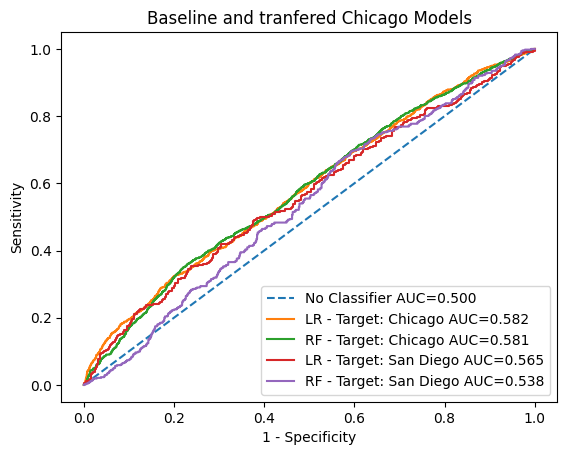

In [65]:
#transfering from chicago to san diego
lr_probs = chi_regr_LR.predict_proba(chi_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = chi_regr_rf.predict_proba(chi_X_test)
rf_probs = rf_probs[:, 1]

lr_probs_t = chi_regr_LR.predict_proba(san_X_test)
lr_probs_t = lr_probs_t[:, 1]

rf_probs_t = chi_regr_rf.predict_proba(san_X_test)
rf_probs_t = rf_probs_t[:, 1]

ns_probs = [0 for _ in range(len(chi_y_test))]
ns_auc = roc_auc_score(chi_y_test, ns_probs)

lr_auc = roc_auc_score(chi_y_test, lr_probs)
rf_auc = roc_auc_score(chi_y_test, rf_probs)
lr_auc_t = roc_auc_score(san_y_test, lr_probs_t)
rf_auc_t = roc_auc_score(san_y_test, rf_probs_t)

# lr_auc = 0.582
# rf_auc = 0.582
# lr_auc_t = 0.602
# rf_auc_t = 0.567

print(lr_auc, rf_auc, lr_auc_t, rf_auc_t)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(chi_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(chi_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(chi_y_test, rf_probs)
lr_fpr_t, lr_tpr_t, _ = roc_curve(san_y_test, lr_probs_t)
rf_fpr_t, rf_tpr_t, _ = roc_curve(san_y_test, rf_probs_t)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR - Target: Chicago AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF - Target: Chicago AUC=%.3f' % (rf_auc))
pyplot.plot(lr_fpr_t, lr_tpr_t, label='LR - Target: San Diego AUC=%.3f' % (lr_auc_t))
pyplot.plot(rf_fpr_t, rf_tpr_t, label='RF - Target: San Diego AUC=%.3f' % (rf_auc_t))

results_AUC['LR'][stid("chi", 'chi')] = lr_auc
results_AUC['RF'][stid("chi", 'chi')] = rf_auc
results_AUC['LR'][stid('chi', "san")] = lr_auc_t
results_AUC['RF'][stid('chi', "san")] = rf_auc_t

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('Baseline and tranfered Chicago Models')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/transfer-chi.png', dpi = 300)

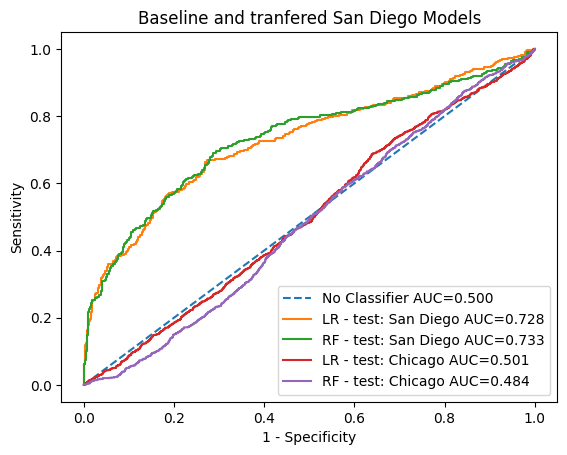

In [66]:
#transfering from san diego to chicago
lr_probs = san_regr_LR.predict_proba(san_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = san_regr_rf.predict_proba(san_X_test)
rf_probs = rf_probs[:, 1]

lr_probs_t = san_regr_LR.predict_proba(chi_X_test)
lr_probs_t = lr_probs_t[:, 1]

rf_probs_t = san_regr_rf.predict_proba(chi_X_test)
rf_probs_t = rf_probs_t[:, 1]

ns_probs = [0 for _ in range(len(san_y_test))]
ns_auc = roc_auc_score(san_y_test, ns_probs)
lr_auc = roc_auc_score(san_y_test, lr_probs)
rf_auc = roc_auc_score(san_y_test, rf_probs)
lr_auc_t = roc_auc_score(chi_y_test, lr_probs_t)
rf_auc_t = roc_auc_score(chi_y_test, rf_probs_t)

# lr_auc = 0.728
# rf_auc = 0.733
# lr_auc_t = 0.500
# rf_auc_t = 0.486

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(san_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(san_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(san_y_test, rf_probs)
lr_fpr_t, lr_tpr_t, _ = roc_curve(chi_y_test, lr_probs_t)
rf_fpr_t, rf_tpr_t, _ = roc_curve(chi_y_test, rf_probs_t)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR - test: San Diego AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF - test: San Diego AUC=%.3f' % (rf_auc))
pyplot.plot(lr_fpr_t, lr_tpr_t, label='LR - test: Chicago AUC=%.3f' % (lr_auc_t))
pyplot.plot(rf_fpr_t, rf_tpr_t, label='RF - test: Chicago AUC=%.3f' % (rf_auc_t))

results_AUC['LR'][stid("san", 'san')] = lr_auc
results_AUC['RF'][stid("san", 'san')] = rf_auc
results_AUC['LR'][stid('san', "chi")] = lr_auc_t
results_AUC['RF'][stid('san', "chi")] = rf_auc_t



# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('Baseline and tranfered San Diego Models')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/transfer-san.png')

# Domain Adaptation

## import

In [50]:
from adapt.feature_based import FA
from adapt.instance_based import BalancedWeighting
from adapt.feature_based import CORAL
from adapt.feature_based import SA

2024-12-27 13:53:07.479584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[CV 3/3; 29/110] START bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800
[CV 3/3; 29/110] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1800;, score=0.701 total time=   8.8s
[CV 3/3; 33/110] START bootstrap=True, max_depth=81, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1533
[CV 3/3; 33/110] END bootstrap=True, max_depth=81, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1533;, score=0.701 total time=   7.1s
[CV 3/3; 35/110] START bootstrap=True, max_depth=74, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800
[CV 3/3; 35/110] END bootstrap=True, max_depth=74, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800;, score=0.703 total time=   9.1s
[CV 3/3; 38/110] START bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/3; 1/110] START bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866
[CV 3/3; 1/110] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1866;, score=0.690 total time=  15.1s
[CV 1/3; 6/110] START bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866
[CV 1/3; 6/110] END bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=866;, score=0.620 total time=  20.8s
[CV 2/3; 9/110] START bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400
[CV 2/3; 9/110] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.713 total time=   9.0s
[CV 3/3; 11/110] START bootstrap=False, max_depth=31, max_features=None, min_samples_leaf=3, min_samples_split=10, n_esti

[CV 1/3; 51/110] START bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=800
[CV 1/3; 51/110] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=800;, score=0.695 total time=   4.6s
[CV 2/3; 52/110] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=1400
[CV 2/3; 52/110] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=1400;, score=0.718 total time=   6.6s
[CV 1/3; 56/110] START bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1533
[CV 1/3; 56/110] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1533;, score=0.662 total time=  21.2s
[CV 1/3; 61/110] START bootstrap=True, max_depth=45, max_features=None, min_samples_leaf=4, min_samples_split=2, n_

[CV 2/3; 23/110] START bootstrap=False, max_depth=38, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1666
[CV 2/3; 23/110] END bootstrap=False, max_depth=38, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1666;, score=0.720 total time=  10.1s
[CV 1/3; 25/110] START bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600
[CV 1/3; 25/110] END bootstrap=True, max_depth=74, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.694 total time=   7.8s
[CV 2/3; 27/110] START bootstrap=True, max_depth=81, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1666
[CV 2/3; 27/110] END bootstrap=True, max_depth=81, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1666;, score=0.714 total time=   7.7s
[CV 2/3; 29/110] START bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_

In [51]:
def balanced_subset(X, y, subset_size):
    positive_indices = np.where(y == 1)[0]
    negative_indices = np.where(y == 0)[0]
    positive_subset_indices = np.random.choice(positive_indices, size=subset_size // 2, replace=False)
    negative_subset_indices = np.random.choice(negative_indices, size=subset_size // 2, replace=False)
    subset_indices = np.concatenate([positive_subset_indices, negative_subset_indices])
    np.random.shuffle(subset_indices)
    X_subset = X[subset_indices]
    y_subset = y[subset_indices]
    return np.array(X_subset), np.array(y_subset)

In [52]:
# targ_labeled_X_san, targ_labeled_y_san = balanced_subset(lax, bur, 100)
# targ_labeled_X_chi, targ_labeled_y_chi = balanced_subset(ohr, mid, 100)

__, targ_labeled_X_san, __, targ_labeled_y_san = train_test_split(san_X_train, san_y_train, test_size = 0.1196)
__, targ_labeled_X_chi, __, targ_labeled_y_chi = train_test_split(chi_X_train, chi_y_train, test_size = 0.1364)

In [53]:
targ_labeled_X_san.shape, targ_labeled_X_chi.shape

((519, 12), (601, 12))

## FA

RF

In [54]:
crf = get_RF(chirfparam)
chi_rf_fa = FA(crf, Xt=targ_labeled_X_san, yt=targ_labeled_y_san, random_state=0, verbose = 0)
chi_rf_fa = stat_significance_trainer_tester(chi_rf_fa, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'RF-FA')

srf = get_RF(sanrfparam)
san_rf_fa = FA(srf, Xt=targ_labeled_X_chi, yt=targ_labeled_y_chi, random_state=0, verbose = 0)
san_rf_fa = stat_significance_trainer_tester(san_rf_fa, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'RF-FA')

----RF-FA----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.338 (0.0293) 0.347 (0.0019) 0.34 (0.0229)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.787 (0.0018) 0.49 (0.0053) 0.67 (0.0027)
0.822 0.22 0.213 0.827 0.691 0.738 0.916 0.367
----RF-FA----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.744 (0.0019) 0.054 (0.0083) 0.472 (0.004)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.832 (0.0023) 0.234 (0.0023) 0.706 (0.0014)
0.605 0.347 0.964 0.029 0.801 0.283 0.865 0.199


LR

In [55]:
clf = get_LR_model(chi_X_train, chi_y_train)
chi_lr_fa = FA(clf, Xt=targ_labeled_X_san, yt=targ_labeled_y_san, random_state=42, verbose = 0)
chi_lr_fa = stat_significance_trainer_tester(chi_lr_fa, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'LR-FA')

slf = get_LR_model(san_X_train, san_y_train)
san_lr_fa = FA(slf, Xt=targ_labeled_X_chi, yt=targ_labeled_y_chi, random_state=42, verbose = 0)
san_lr_fa = stat_significance_trainer_tester(san_lr_fa, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'LR-FA')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-FA----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.317 (0.0207) 0.344 (0.0014) 0.323 (0.016)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.796 (0.0011) 0.464 (0.0004) 0.666 (0.0005)
0.813 0.217 0.197 0.83 0.685 0.813 0.951 0.325
Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-FA----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.744 (0.0028) 0.254 (0.008) 0.551 (0.0027)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.676 (0.0019) 0.332 (0.0006) 0.603 (0.0015)
0.628 0.554 0.914 0.165 0.816 0.246 0.577 0.514
[CV 1/3; 1/27] START C=0.01, max_iter=500, solver=newton-cg.....................
[CV 1/3; 1/27] END C=0.01, max_iter=500, solver=newton-cg;, score=0.552 total time= 

[CV 2/3; 1/27] START C=0.01, max_iter=500, solver=newton-cg.....................
[CV 2/3; 1/27] END C=0.01, max_iter=500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 3/3; 5/27] START C=0.01, max_iter=1000, solver=lbfgs........................
[CV 3/3; 5/27] END C=0.01, max_iter=1000, solver=lbfgs;, score=0.553 total time=   0.0s
[CV 1/3; 7/27] START C=0.01, max_iter=1500, solver=newton-cg....................
[CV 1/3; 7/27] END C=0.01, max_iter=1500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 1/3; 11/27] START C=1, max_iter=500, solver=lbfgs...........................
[CV 1/3; 11/27] END C=1, max_iter=500, solver=lbfgs;, score=0.605 total time=   0.0s
[CV 1/3; 14/27] START C=1, max_iter=1000, solver=lbfgs..........................
[CV 1/3; 14/27] END C=1, max_iter=1000, solver=lbfgs;, score=0.605 total time=   0.0s
[CV 3/3; 15/27] START C=1, max_iter=1000, solver=liblinear......................
[CV 3/3; 15/27] END C=1, max_iter=1000, solver=liblinear;, score=0.633 t

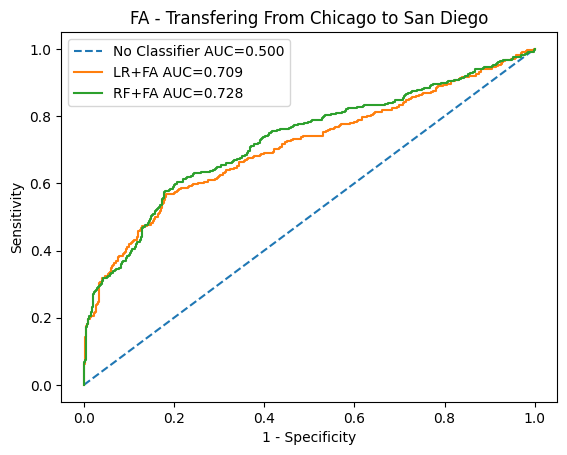

In [62]:
#transfering from chicago to san diego
lr_probs = chi_lr_fa.predict_prob(san_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = chi_rf_fa.predict_prob(san_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(san_y_test))]
ns_auc = roc_auc_score(san_y_test, ns_probs)

lr_auc = roc_auc_score(san_y_test, lr_probs)
rf_auc = roc_auc_score(san_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(san_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(san_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(san_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+FA AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+FA AUC=%.3f' % (rf_auc))

results_AUC['LR-FA'][stid("chi", 'san')] = lr_auc
results_AUC['RF-FA'][stid("chi", 'san')] = rf_auc




# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('FA - Transfering From Chicago to San Diego')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/FA-chi.png')

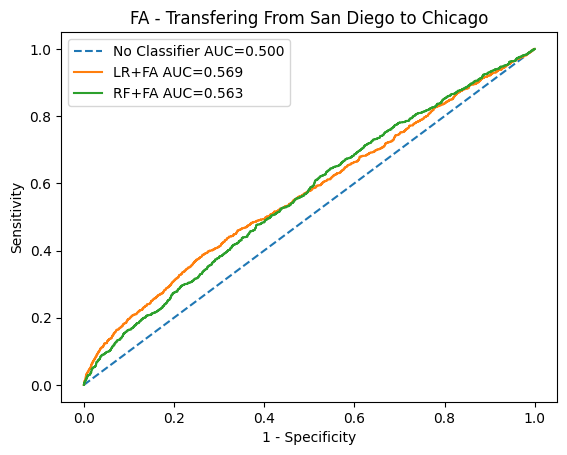

In [63]:
#transfering from san to chi
lr_probs = san_lr_fa.predict_prob(chi_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = san_rf_fa.predict_prob(chi_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(chi_y_test))]
ns_auc = roc_auc_score(chi_y_test, ns_probs)

lr_auc = roc_auc_score(chi_y_test, lr_probs)
rf_auc = roc_auc_score(chi_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(chi_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(chi_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(chi_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+FA AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+FA AUC=%.3f' % (rf_auc))

results_AUC['LR-FA'][stid("san", 'chi')] = lr_auc
results_AUC['RF-FA'][stid("san", 'chi')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('FA - Transfering From San Diego to Chicago')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/FA-san.png')

## BW

RF

In [58]:
regr = get_RF(chirfparam)
crb = BalancedWeighting(regr, Xt=targ_labeled_X_san, yt=targ_labeled_y_san, random_state=0, verbose = 0)
crb = stat_significance_trainer_tester(crb, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'RF-BW')

regr =  get_RF(sanrfparam)
srb = BalancedWeighting(regr, Xt=targ_labeled_X_chi, yt=targ_labeled_y_chi, random_state=0, verbose = 0)
srb = stat_significance_trainer_tester(srb, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'RF-BW')

----RF-BW----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.785 (0.0041) 0.317 (0.0073) 0.686 (0.0037)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.783 (0.002) 0.461 (0.0071) 0.656 (0.0036)
0.815 0.284 0.756 0.36 0.681 0.73 0.919 0.337
----RF-BW----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.792 (0.0029) 0.52 (0.0087) 0.685 (0.0048)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.827 (0.0052) 0.227 (0.0065) 0.7 (0.0029)
0.7 0.742 0.91 0.4 0.799 0.27 0.857 0.197


LR

In [59]:
regr = get_LR_model(chi_X_train, chi_y_train)
clb = BalancedWeighting(regr, Xt=targ_labeled_X_san, yt=targ_labeled_y_san, random_state=0, verbose = 0)
clb = stat_significance_trainer_tester(clb, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'LR-BW')

regr = get_LR_model(san_X_train, san_y_train)
slb = BalancedWeighting(regr, Xt=targ_labeled_X_chi, yt=targ_labeled_y_chi, random_state=0, verbose = 0)
slb = stat_significance_trainer_tester(slb, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'LR-BW')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-BW----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.819 (0.0116) 0.262 (0.0119) 0.701 (0.0073)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.784 (0.0013) 0.324 (0.0027) 0.603 (0.0013)
0.805 0.284 0.833 0.245 0.654 0.86 0.979 0.2
Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-BW----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.762 (0.0034) 0.227 (0.0135) 0.552 (0.0056)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.853 (0.0091) 0.198 (0.0264) 0.715 (0.0022)
0.632 0.696 0.961 0.136 0.8 0.315 0.914 0.147


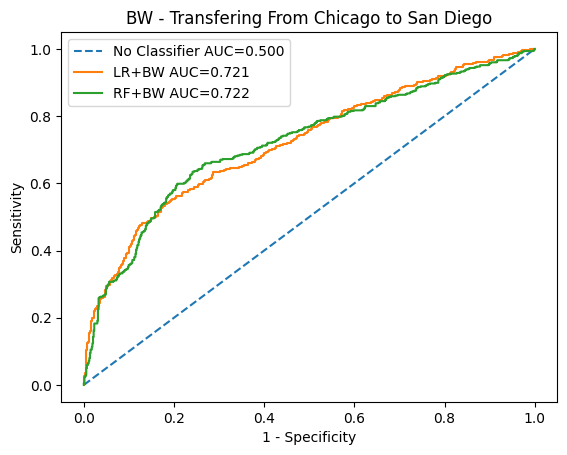

In [64]:
#transfering from chicago to san diego
lr_probs = clb.predict_prob(san_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = crb.predict_prob(san_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(san_y_test))]
ns_auc = roc_auc_score(san_y_test, ns_probs)

lr_auc = roc_auc_score(san_y_test, lr_probs)
rf_auc = roc_auc_score(san_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(san_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(san_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(san_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+BW AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+BW AUC=%.3f' % (rf_auc))

results_AUC['LR-BW'][stid("chi", 'san')] = lr_auc
results_AUC['RF-BW'][stid("chi", 'san')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('BW - Transfering From Chicago to San Diego')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/BW-chi.png')

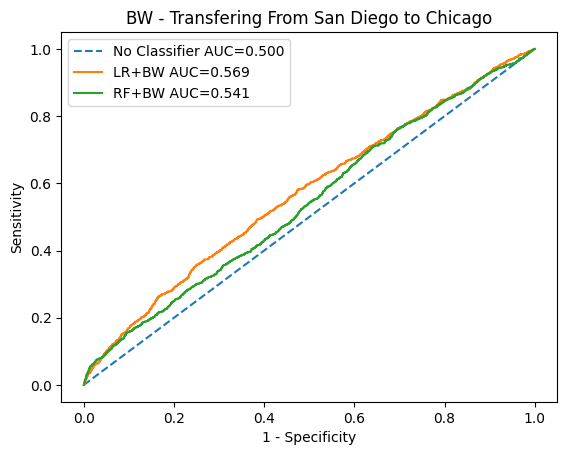

In [65]:
#transfering from san to chi
lr_probs = slb.predict_prob(chi_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = srb.predict_prob(chi_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(chi_y_test))]
ns_auc = roc_auc_score(chi_y_test, ns_probs)

lr_auc = roc_auc_score(chi_y_test, lr_probs)
rf_auc = roc_auc_score(chi_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(chi_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(chi_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(chi_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+BW AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+BW AUC=%.3f' % (rf_auc))

results_AUC['LR-BW'][stid("san", 'chi')] = lr_auc
results_AUC['RF-BW'][stid("san", 'chi')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('BW - Transfering From San Diego to Chicago')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/BW-san.png')

## CORAL

RF

In [66]:
regr = get_RF(chirfparam)
crc = CORAL(regr, Xt=san_X_train, random_state=0, verbose = 0)
crc = stat_significance_trainer_tester(crc, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'RF-CORAL')

regr = get_RF(sanrfparam)
src = CORAL(regr, Xt=chi_X_train, random_state=0, verbose = 0)
src = stat_significance_trainer_tester(src, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'RF-CORAL')

----RF-CORAL----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.523 (0.0959) 0.347 (0.0118) 0.486 (0.0739)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.612 (0.0702) 0.368 (0.0988) 0.516 (0.0199)
0.827 0.234 0.392 0.689 0.608 0.402 0.631 0.376
----RF-CORAL----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.75 (0.0433) 0.572 (0.013) 0.68 (0.0306)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.37 (0.0737) 0.35 (0.0023) 0.366 (0.0585)
0.721 0.631 0.787 0.531 0.828 0.224 0.242 0.814


LR

In [67]:
regr = get_LR_model(chi_X_train, chi_y_train)
clc = CORAL(regr, Xt=san_X_train, random_state=0, verbose = 0)
clc = stat_significance_trainer_tester(clc, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'LR-CORAL')

regr = get_LR_model(san_X_train, san_y_train)
slc = CORAL(regr, Xt=chi_X_train, random_state=0, verbose = 0)
slc = stat_significance_trainer_tester(slc, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'LR-CORAL')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-CORAL----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.616 (0.0299) 0.347 (0.0056) 0.559 (0.0229)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.748 (0.0067) 0.128 (0.0158) 0.504 (0.0049)
0.825 0.243 0.492 0.608 0.614 0.546 0.957 0.073
Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-CORAL----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.722 (0.0068) 0.616 (0.002) 0.681 (0.0048)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.261 (0.0427) 0.34 (0.004) 0.278 (0.033)
0.757 0.58 0.691 0.658 0.798 0.213 0.157 0.85


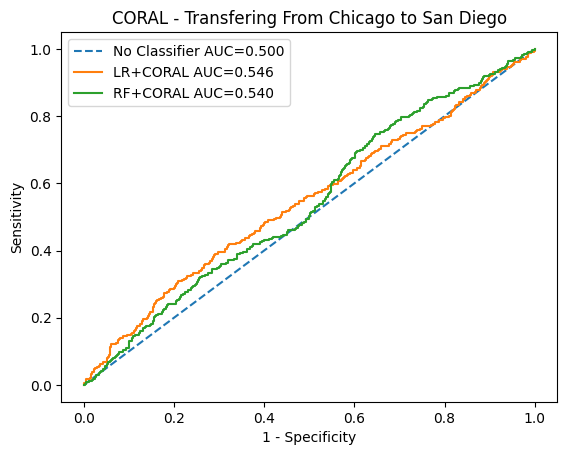

In [68]:
#transfering from chicago to san diego
lr_probs = clc.predict_prob(san_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = crc.predict_prob(san_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(san_y_test))]
ns_auc = roc_auc_score(san_y_test, ns_probs)

lr_auc = roc_auc_score(san_y_test, lr_probs)
rf_auc = roc_auc_score(san_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(san_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(san_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(san_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+CORAL AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+CORAL AUC=%.3f' % (rf_auc))

results_AUC['LR-CORAL'][stid("chi", 'san')] = lr_auc
results_AUC['RF-CORAL'][stid("chi", 'san')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('CORAL - Transfering From Chicago to San Diego')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/c-chi.png')

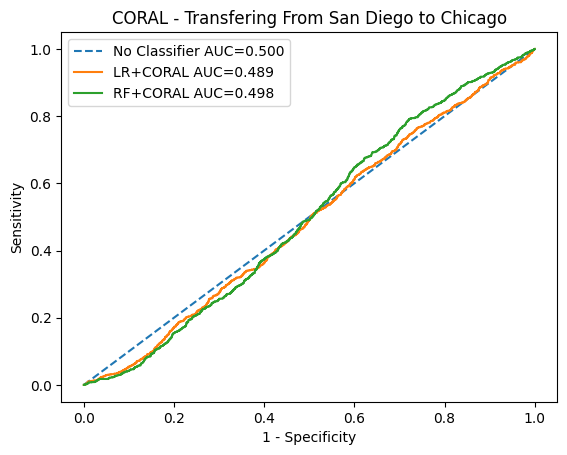

In [69]:
#transfering from san to chi
lr_probs = slc.predict_prob(chi_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = src.predict_prob(chi_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(chi_y_test))]
ns_auc = roc_auc_score(chi_y_test, ns_probs)

lr_auc = roc_auc_score(chi_y_test, lr_probs)
rf_auc = roc_auc_score(chi_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(chi_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(chi_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(chi_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+CORAL AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+CORAL AUC=%.3f' % (rf_auc))

results_AUC['LR-CORAL'][stid("san", 'chi')] = lr_auc
results_AUC['RF-CORAL'][stid("san", 'chi')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('CORAL - Transfering From San Diego to Chicago')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/c-san.png')

## SA

RF

In [70]:
regr = get_RF(chirfparam)
crs = SA(regr, Xt=san_X_train, random_state=0, verbose = 0)
crs = stat_significance_trainer_tester(crs, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'RF-SA')

regr = get_RF(sanrfparam)
srs = SA(regr, Xt=chi_X_train, random_state=0, verbose = 0)
srs = stat_significance_trainer_tester(srs, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'RF-SA')

----RF-SA----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.795 (0.0468) 0.301 (0.0342) 0.691 (0.0318)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.756 (0.0061) 0.113 (0.0606) 0.503 (0.0262)
0.814 0.299 0.783 0.328 0.617 0.61 0.977 0.063
----RF-SA----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.784 (0.0029) 0.389 (0.0184) 0.629 (0.0072)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.825 (0.0048) 0.109 (0.0211) 0.674 (0.0027)
0.665 0.793 0.956 0.258 0.781 0.153 0.875 0.086


LR

In [71]:
regr = get_LR_model(chi_X_train, chi_y_train)
cls = SA(regr, Xt=san_X_train, random_state=0, verbose = 0)
cls = stat_significance_trainer_tester(cls, chi_X_train, chi_y_train, chi_X_test, chi_y_test, san_X_test, san_y_test, source_name = "Chicago", target_name = 'San Diego', model_name = 'LR-SA')

regr = get_LR_model(san_X_train, san_y_train)
sls = SA(regr, Xt=chi_X_train, random_state=0, verbose = 0)
sls = stat_significance_trainer_tester(sls, san_X_train, san_y_train, san_X_test, san_y_test, chi_X_test, chi_y_test, source_name = "San Diego", target_name = 'Chicago', model_name = 'LR-SA')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-SA----
Chicago Model:
Chicago test data:		  - Stat Significance Test -/+/w mean (STD) 0.626 (0.0406) 0.346 (0.0081) 0.567 (0.0306)
San Diego test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.747 (0.0031) 0.276 (0.0159) 0.562 (0.0079)
0.824 0.245 0.507 0.595 0.632 0.574 0.913 0.182
Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'C': 10, 'max_iter': 500, 'solver': 'newton-cg'}
----LR-SA----
San Diego Model:
San Diego test data:		  - Stat Significance Test -/+/w mean (STD) 0.774 (0.0018) 0.194 (0.0152) 0.546 (0.0071)
Chicago test data (Transfered): - Stat Significance Test -/+/w mean (STD) 0.847 (0.006) 0.089 (0.0169) 0.687 (0.0028)
0.633 0.962 0.997 0.108 0.785 0.166 0.919 0.061


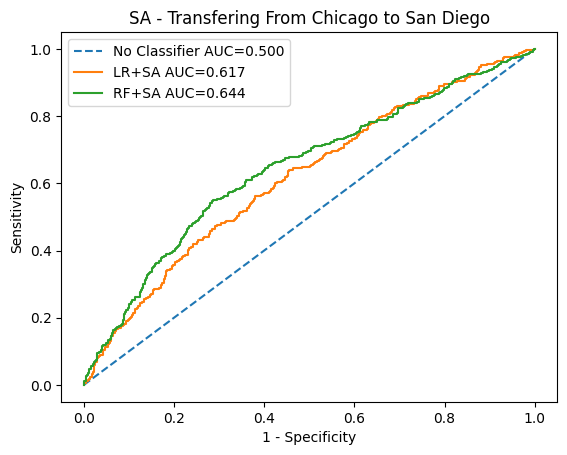

In [72]:
#transfering from chicago to san diego
lr_probs = cls.predict_prob(san_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = crs.predict_prob(san_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(san_y_test))]
ns_auc = roc_auc_score(san_y_test, ns_probs)

lr_auc = roc_auc_score(san_y_test, lr_probs)
rf_auc = roc_auc_score(san_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(san_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(san_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(san_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+SA AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+SA AUC=%.3f' % (rf_auc))

results_AUC['LR-SA'][stid("chi", 'san')] = lr_auc
results_AUC['RF-SA'][stid("chi", 'san')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('SA - Transfering From Chicago to San Diego')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/s-chi.png')

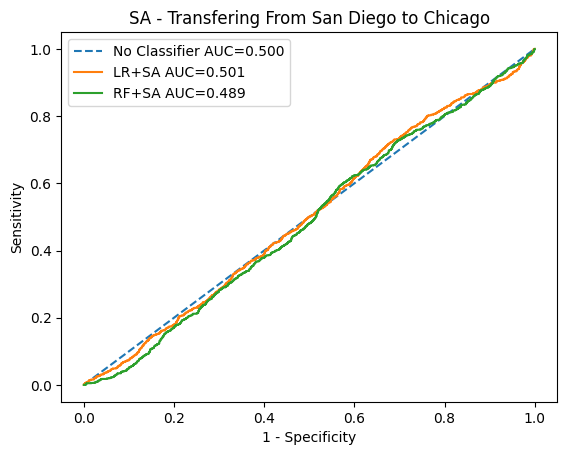

[CV 1/3; 3/27] START C=0.01, max_iter=500, solver=liblinear.....................
[CV 1/3; 3/27] END C=0.01, max_iter=500, solver=liblinear;, score=0.552 total time=   0.0s
[CV 3/3; 3/27] START C=0.01, max_iter=500, solver=liblinear.....................
[CV 3/3; 3/27] END C=0.01, max_iter=500, solver=liblinear;, score=0.553 total time=   0.0s
[CV 1/3; 4/27] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 1/3; 4/27] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 3/3; 5/27] START C=0.01, max_iter=1000, solver=lbfgs........................
[CV 3/3; 5/27] END C=0.01, max_iter=1000, solver=lbfgs;, score=0.553 total time=   0.0s
[CV 1/3; 7/27] START C=0.01, max_iter=1500, solver=newton-cg....................
[CV 1/3; 7/27] END C=0.01, max_iter=1500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 3/3; 8/27] START C=0.01, max_iter=1500, solver=lbfgs........................
[CV 3/3; 8/27] END C=0.01, max_iter=1500, solver=lbfgs;, sco

[CV 1/3; 1/27] START C=0.01, max_iter=500, solver=newton-cg.....................
[CV 1/3; 1/27] END C=0.01, max_iter=500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 1/3; 5/27] START C=0.01, max_iter=1000, solver=lbfgs........................
[CV 1/3; 5/27] END C=0.01, max_iter=1000, solver=lbfgs;, score=0.552 total time=   0.0s
[CV 2/3; 9/27] START C=0.01, max_iter=1500, solver=liblinear....................
[CV 2/3; 9/27] END C=0.01, max_iter=1500, solver=liblinear;, score=0.552 total time=   0.0s
[CV 1/3; 11/27] START C=1, max_iter=500, solver=lbfgs...........................
[CV 1/3; 11/27] END C=1, max_iter=500, solver=lbfgs;, score=0.605 total time=   0.0s
[CV 3/3; 14/27] START C=1, max_iter=1000, solver=lbfgs..........................
[CV 3/3; 14/27] END C=1, max_iter=1000, solver=lbfgs;, score=0.632 total time=   0.0s
[CV 3/3; 17/27] START C=1, max_iter=1500, solver=lbfgs..........................
[CV 3/3; 17/27] END C=1, max_iter=1500, solver=lbfgs;, score=0.632 total

[CV 2/3; 1/27] START C=0.01, max_iter=500, solver=newton-cg.....................
[CV 2/3; 1/27] END C=0.01, max_iter=500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 2/3; 5/27] START C=0.01, max_iter=1000, solver=lbfgs........................
[CV 2/3; 5/27] END C=0.01, max_iter=1000, solver=lbfgs;, score=0.552 total time=   0.0s
[CV 3/3; 7/27] START C=0.01, max_iter=1500, solver=newton-cg....................
[CV 3/3; 7/27] END C=0.01, max_iter=1500, solver=newton-cg;, score=0.553 total time=   0.0s
[CV 1/3; 9/27] START C=0.01, max_iter=1500, solver=liblinear....................
[CV 1/3; 9/27] END C=0.01, max_iter=1500, solver=liblinear;, score=0.552 total time=   0.0s
[CV 2/3; 11/27] START C=1, max_iter=500, solver=lbfgs...........................
[CV 2/3; 11/27] END C=1, max_iter=500, solver=lbfgs;, score=0.626 total time=   0.0s
[CV 3/3; 13/27] START C=1, max_iter=1000, solver=newton-cg......................
[CV 3/3; 13/27] END C=1, max_iter=1000, solver=newton-cg;, score=0

[CV 3/3; 23/27] START C=10, max_iter=1000, solver=lbfgs.........................
[CV 3/3; 23/27] END C=10, max_iter=1000, solver=lbfgs;, score=0.685 total time=   0.0s
[CV 1/3; 24/27] START C=10, max_iter=1000, solver=liblinear.....................
[CV 1/3; 24/27] END C=10, max_iter=1000, solver=liblinear;, score=0.658 total time=   0.0s
[CV 2/3; 24/27] START C=10, max_iter=1000, solver=liblinear.....................
[CV 2/3; 24/27] END C=10, max_iter=1000, solver=liblinear;, score=0.692 total time=   0.0s
[CV 3/3; 24/27] START C=10, max_iter=1000, solver=liblinear.....................
[CV 3/3; 24/27] END C=10, max_iter=1000, solver=liblinear;, score=0.685 total time=   0.0s
[CV 1/3; 1/27] START C=0.01, max_iter=500, solver=newton-cg.....................
[CV 1/3; 1/27] END C=0.01, max_iter=500, solver=newton-cg;, score=0.552 total time=   0.0s
[CV 3/3; 2/27] START C=0.01, max_iter=500, solver=lbfgs.........................
[CV 3/3; 2/27] END C=0.01, max_iter=500, solver=lbfgs;, score=0

In [73]:
#transfering from san to chi
lr_probs = sls.predict_prob(chi_X_test)
lr_probs = lr_probs[:, 1]

rf_probs = srs.predict_prob(chi_X_test)
rf_probs = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(chi_y_test))]
ns_auc = roc_auc_score(chi_y_test, ns_probs)

lr_auc = roc_auc_score(chi_y_test, lr_probs)
rf_auc = roc_auc_score(chi_y_test, rf_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(chi_y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(chi_y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(chi_y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Classifier AUC=%.3f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, label='LR+SA AUC=%.3f' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, label='RF+SA AUC=%.3f' % (rf_auc))

results_AUC['LR-SA'][stid("san", 'chi')] = lr_auc
results_AUC['RF-SA'][stid("san", 'chi')] = rf_auc

# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
pyplot.title('SA - Transfering From San Diego to Chicago')
# show the legend
pyplot.legend()
# show the plot
# pyplot.show()
plt.savefig('images/s-san.png')

# Results Export

In [ ]:
results_f_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_f.items()}
results_f = pd.DataFrame.from_dict(results_f_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_f_std_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_f_std.items()}
results_f_std = pd.DataFrame.from_dict(results_f_std_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_np_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_np.items()}
results_np = pd.DataFrame.from_dict(results_np_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_np_std_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_np_std.items()}
results_np_std = pd.DataFrame.from_dict(results_np_std_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_np_P_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_np_P.items()}
results_np_P = pd.DataFrame.from_dict(results_np_P_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_np_R_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_np_R.items()}
results_np_R = pd.DataFrame.from_dict(results_np_R_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])

results_AUC_transposed = {key: [value['metric'], value['chi-chi'], value['chi-san'], value['san-chi'], value['san-san']] for key, value in results_AUC.items()}
results_AUC = pd.DataFrame.from_dict(results_AUC_transposed, orient='index', columns=['metric', 'chi-chi', 'chi-san', 'san-chi', 'san-san'])


res_df = pd.concat([results_f, results_f_std, results_np, results_np_std, results_np_P, results_np_R, results_AUC], keys=['results_f', 'results_f_std', 'results_np', 'results_np_std', 'results_np_P', 'results_np_R', 'results_np_AUC'])


res_df.to_csv('./concatenated_results0.csv')


test